In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import copy
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import pickle


from model import get_model
from utills import rearrange, load_data, extract_piece, swap_piece

In [3]:
base_path = 'data/puzzle_2x2/'

## Defining essential variables

In [4]:
cuts = 2    
channel = 3
im_size = 200

## Load pretrained model, you can download the model from [here](https://www.floydhub.com/shivaverma/workspaces/run_LEzD4uEtzqggKf5p2risz7NE)

In [5]:
# model = keras.models.load_model('model/jigsaw.model')

## Or train from scratch model

In [5]:
model = get_model()

In [7]:
adam = keras.optimizers.Adam(learning_rate=.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam)

In [8]:
x_val,   y_val   = load_data(base_path, 'valid')
x_train, y_train = load_data(base_path, 'train')

: 

In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs=16, validation_data=(x_val, y_val))

Epoch 1/16
141/141 [==============================] - 116s 779ms/step - loss: 1.5172 - val_loss: 1.2940
Epoch 2/16
141/141 [==============================] - 105s 746ms/step - loss: 1.1480 - val_loss: 1.1163
Epoch 3/16
141/141 [==============================] - 107s 760ms/step - loss: 0.9558 - val_loss: 0.9994
Epoch 4/16
141/141 [==============================] - 101s 717ms/step - loss: 0.7958 - val_loss: 0.8193
Epoch 5/16
141/141 [==============================] - 101s 715ms/step - loss: 0.6509 - val_loss: 0.8345
Epoch 6/16
141/141 [==============================] - 104s 739ms/step - loss: 0.5161 - val_loss: 0.7903
Epoch 7/16
141/141 [==============================] - 102s 722ms/step - loss: 0.3908 - val_loss: 0.8773
Epoch 8/16
141/141 [==============================] - 101s 714ms/step - loss: 0.3013 - val_loss: 0.9356
Epoch 9/16
141/141 [==============================] - 102s 724ms/step - loss: 0.2266 - val_loss: 0.9504
Epoch 10/16
141/141 [==============================] - 101s 716m

In [6]:
model_pkl_file = "jigsaw_classifier_model.pkl"
with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\activation
......vars
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_1
......vars
.........0
.........1
.........2
.........3
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\reshape
......vars
...layers\time_distributed
......vars
...layers\time_distributed\layer
......vars
...layers\time_distributed_1
......vars
...layers\time_distributed_10
......vars
...layers\time_distributed_10\layer
......vars
.........0
.........1
...layers\time_distributed_11
......vars
...layers\time_distributed_11\layer
......vars
.........0
.........1
.........2
.........3
...layers\time_distributed_12
......vars
...layers\time_distributed_12\layer
......vars
...layers\time_distributed_1\layer
.....

## Loading test data

In [7]:
x_test, y_test = load_data(base_path, 'test')

In [8]:
from IPython.display import clear_output

## Testing indivisual Image

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-11-18 10:52:32        10207
metadata.json                                  2023-11-18 10:52:32           64
variables.h5                                   2023-11-18 10:52:32     96771928
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\activation
......vars
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_1
......vars
.........0
.........1
.........2
.........3
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\reshape
......vars
...layers\time_distributed
......vars
...layers\time_distributed\layer
......vars
...layers\time_distributed_1
......vars
...layers\time_distri

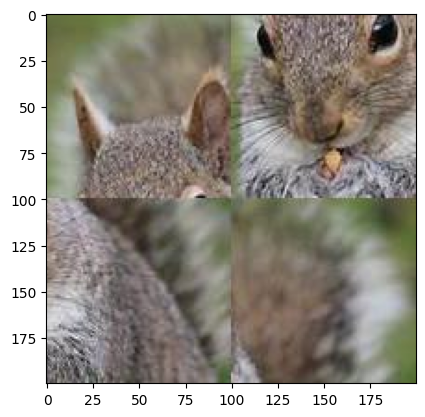

1/1 [==============================] - 0s 274ms/step


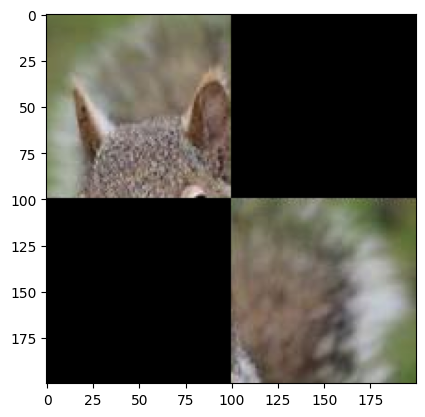

In [17]:
with open(model_pkl_file, 'rb') as file:
    model = pickle.load(file)
im = 2

plt.imshow(x_test[im].astype('float64')+.5)
plt.show()

inp = np.expand_dims(extract_piece(x_test[im]), axis=0)
out = model.predict(inp)[0]
out = np.argmax(out, axis=1)
rearrange(np.array(x_test[im])+.5, out)

## Testing whole test set

In [18]:
solved = 0
x_test_proc = []

for i in x_test:
    x_test_proc.append(extract_piece(i))
    
x_test_proc = np.array(x_test_proc) 
out = model.predict(x_test_proc)

for i in range(len(out)):
    pos = np.argmax(out[i], axis=1)
    if list(pos) == list(y_test[i].reshape(cuts*cuts)):
        solved += 1

print("Accuracy on {} samples: {}%".format(len(out), round((solved/i)*100, 2)))

32/32 [==============================] - 3s 87ms/step
Accuracy on 998 samples: 0.5%


## Correct prediction percentage for each position

In [ ]:
all_val = []

for i in range(len(out)):

    pos = np.argmax(out[i], axis=1)
    val = (pos==y_test[i].reshape(cuts*cuts)).astype('int')    
    all_val.append(val)

all_val = np.array(all_val)
[round(i, 2) for i in (np.sum(all_val, axis=0)/len(out))*100]

[62.42, 66.03, 66.33, 67.23]